In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


In [87]:

def getRatings(fileName, ratingsDict):
    ratings  = pickle.load( open( fileName, "rb" ) )


    for key, value in ratings.items():
        index = key.split('_')[1]
        ratingsDict['maxIndex'] = max(ratingsDict['maxIndex'], int(index))  
        
        ratingsDict['Craftsmanship'][key].append(value['craftsmanship'])
        ratingsDict['Creativity'][key].append(value['creativity'])
        ratingsDict['Consistency'][key].append(value['consistency'])

    return ratingsDict



def plotRatings(ratingsDict, criteria):
    scores = np.array(range(10))
    size = ratingsDict['maxIndex'] + 1
    img = np.zeros((size,size), dtype=np.float32)


    baseValueList = []
    for key, value in ratingsDict[criteria].items():
        x,y = key.split('_')   
        value = [np.sum(scores*np.array(v)) for v in value]

        if y == '0':
            baseValueList.append(value)
        x = int(x)
        y = int(y)
        if len(value) > 0:
            img[x, y] = sum(value)/len(value)

    baseValue = np.mean(baseValueList)

    mask = img == 0

    img[mask] = baseValue

    plt.figure()
    
    img = img + (5 - baseValue)

    plt.imshow(img, cmap='RdBu', vmin=0, vmax=10)
    plt.colorbar()

    plt.title(criteria)
    plt.ylabel('Repeat start layer')
    plt.xlabel('Repeat stop layer')
    return img, baseValueList   



def print_rating(img):
    print(f"Maximum Value for combined: {np.unravel_index(np.argmax(img), np.array(img).shape)}, with value: {np.max(img)}")

def topN(ratingsDict, n):
    scores = np.array(range(10))

    # Compute averages and store them with keys
    scores = np.array(range(10))
    averages = [(key, np.mean([np.sum(scores*np.array(v)) for v in values])) for key, values in ratingsDict.items()]

    print(f'{averages=}')

    # Sort based on the averages
    averages.sort(key=lambda x: x[1], reverse=True)

    # Select the top n keys and their averages
    top_n_keys_with_averages = averages[:n]

    print(f"Top {n} keys with their averages:")
    for key, avg in top_n_keys_with_averages:
        print(f"Key: {key}, Average: {avg}")



def plotHistograms(ratingsDict1, criteria):
    scores = np.array(range(10))
    baseRatingList = []
    ratingList = []
    for key, value in ratingsDict1[criteria].items():
        ratingList.extend([np.sum(scores*np.array(v)) for v in value if key.split('_')[1] != '0'])
        baseRatingList.extend([np.sum(scores*np.array(v)) for v in value if key.split('_')[1] == '0'])
    plt.figure()

    print(f'{baseRatingList=}')
    print(len(baseRatingList))
    print(len(ratingList))

    plt.hist(ratingList, bins=100, edgecolor='black')
    plt.axvline(x=np.mean(baseRatingList), color='r', linestyle='--', linewidth=2)
    plt.axvline(x=np.mean(baseRatingList) - np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    plt.axvline(x=np.mean(baseRatingList) + np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'{criteria} Ratings')
    plt.xlim(0, 10)

    plt.show()

def getStandardDeviation(ratingsDict, criteria):
    ratingList = []
    for l in ratingsDict[criteria].values():
        ratingList.append(np.std(l))

    return np.mean(ratingList)


def getAllRatings(fileName):
    ratingsDict = defaultdict(lambda: defaultdict(list))
    ratingsDict['maxIndex'] = 0
    for i in range(1,11):
        ratingsDict = getRatings(fileName.format(i), ratingsDict)

    craft, craftBaseValueList = plotRatings(ratingsDict, 'Craftsmanship')
    creat,  creatBaseValueList = plotRatings(ratingsDict, 'Creativity')
    consist, consistBaseValueList = plotRatings(ratingsDict, 'Consistency')

    plt.figure()

    combined = (craft + creat + consist)/3
    plt.imshow(combined, cmap='RdBu', vmin=0, vmax=10)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'Combined Ratings')
    return ratingsDict


def plotAllHistograms(ratingsDict):
    plotHistograms(ratingsDict, 'Craftsmanship')
    plotHistograms(ratingsDict, 'Creativity')
    plotHistograms(ratingsDict, 'Consistency')
    

# TinyLlama

baseRatingList=[5.002463115731669, 4.309442446849023, 5.006926863280647, 5.893154491169678, 5.117336847975122, 5.106659757296357, 5.166188459387572, 5.317986668120431, 5.004372772626654, 5.063594260426739, 3.811000977935071, 4.999734441890251, 5.065041602533483, 5.129959527940236, 5.079081772292383, 6.660363560950405, 5.121007110855647, 5.770606464359376, 5.0635562345003455, 5.1158927419725275, 5.473141031622291, 4.665929725460889, 5.067362154484243, 6.117494223817541, 5.928763757284351, 6.383071394335234, 5.619062137273531, 4.999804183940153, 5.6674543436667335, 4.925187155082424, 5.954951979074858, 5.0444298416712865, 5.924458389423444, 4.963221581321954, 5.639730365618767, 5.929447373668475, 5.088942219636572, 5.074408577859671, 5.0551971031255025, 5.356276841697702, 5.024083942584118, 7.108845422912729, 5.343129501155561, 5.767477985121663, 5.413456421108754, 5.768900701696277, 5.594375785159519, 4.843452105599938, 5.10858265709069, 5.551433575242796, 4.941431751408309, 5.568909963

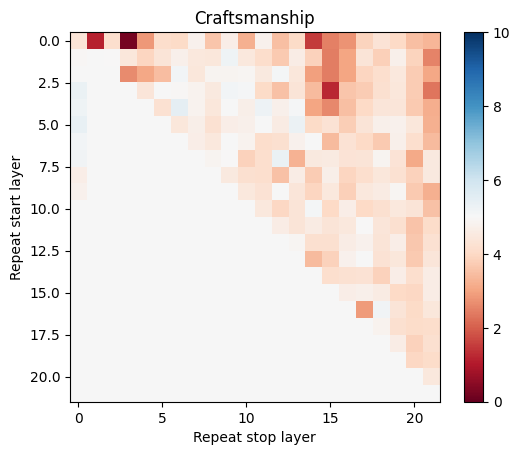

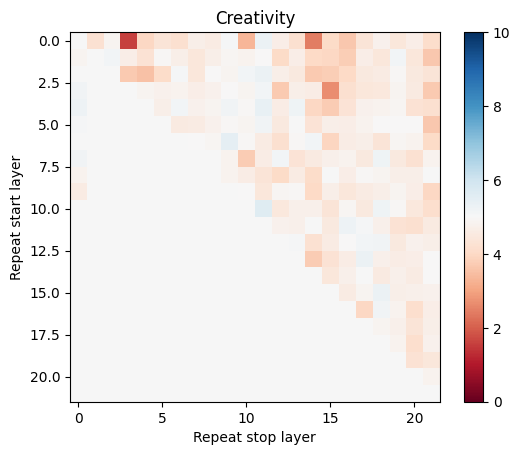

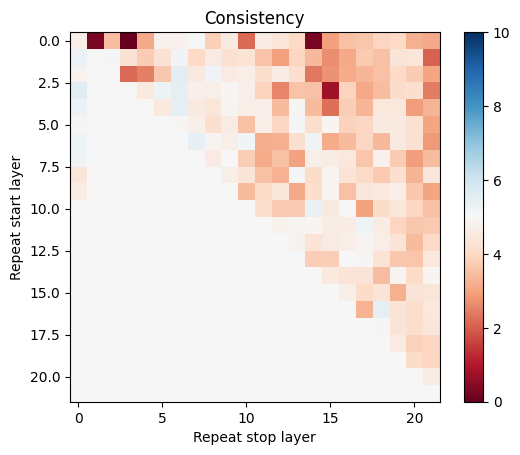

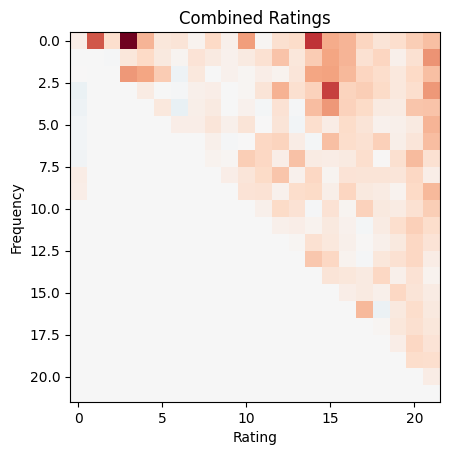

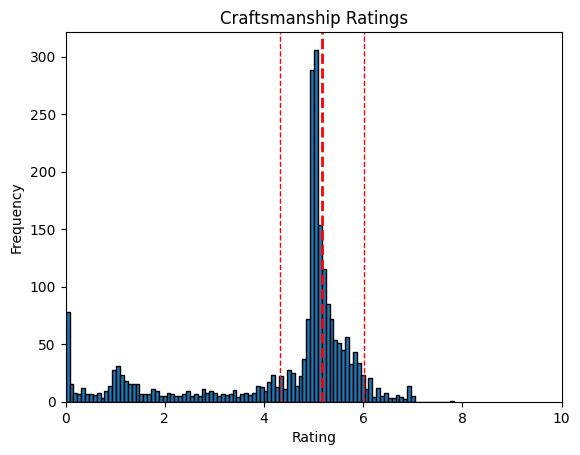

baseRatingList=[3.8216036055669544, 3.364711909201464, 4.120543318168551, 5.179588157385004, 4.88318565242239, 4.9962865550441995, 5.069845179795202, 6.10900087014457, 3.9981834988456932, 3.955305261283094, 2.013341657863813, 4.880847019830792, 4.608897735313587, 4.906182016257731, 5.017693042066821, 5.638617410447779, 5.3142689181720595, 5.148855458421718, 5.03297658962631, 4.786689455480573, 4.381985016655072, 4.58328718693325, 3.659023564198941, 6.164948769759494, 5.314024765459656, 5.726805807621012, 5.7880629756663815, 4.902911234926819, 4.996753545756789, 3.280641701291368, 4.843763354230306, 4.5874758372741935, 4.217233900464257, 4.823272992588903, 5.531684220586947, 5.086015534124063, 5.433881647322165, 5.021115004059015, 4.932162933946269, 4.919330384714039, 3.1812064080885785, 5.0314579270985895, 5.013957095338642, 5.069835651730807, 4.91790480624179, 5.019534324486548, 5.004343896062712, 4.459100402535749, 4.9098875820901755, 4.934965118495662, 3.0142047444704256, 4.99783479

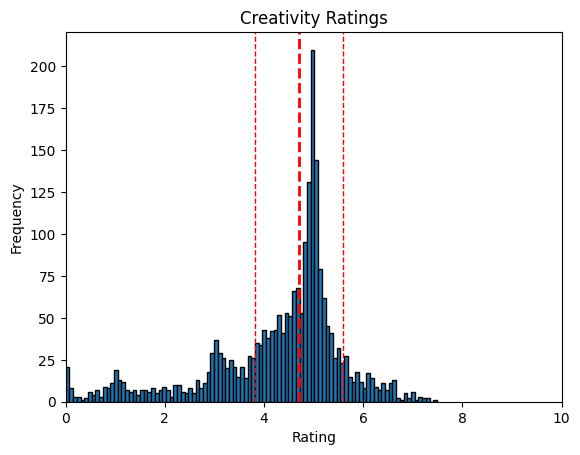

baseRatingList=[6.081398388956684, 5.918718691937386, 6.990573384886016, 7.618489930260679, 7.063936985636602, 7.086734015190766, 7.43330552022468, 7.127814237101722, 7.036188200437502, 6.842328621093409, 1.6342276056654441, 6.743053101071737, 7.225880968263495, 6.1365633484299735, 7.045009530486339, 7.355171711940475, 7.1571549669737955, 7.04914122667615, 7.007307870362049, 7.160183607898308, 5.705141365340296, 5.439147936296649, 7.200220339617491, 8.475679563944357, 7.864547194442245, 8.125743990644404, 8.001028860510328, 7.0257692909598095, 6.886644761958095, 6.85485438753459, 7.0802134424682635, 6.989956352414534, 6.37041926000418, 6.006156655246741, 7.140644130928275, 7.441649122357564, 7.099385809873928, 6.792810247458188, 7.0051495655307905, 7.0338529511737296, 5.021194138736973, 5.576420984788285, 7.0401240611540095, 7.765068726009737, 5.41924627422042, 7.099672770466606, 7.377311471206231, 6.310451380929944, 6.961257531610041, 7.106067732738158, 5.985442830968225, 6.9988725005

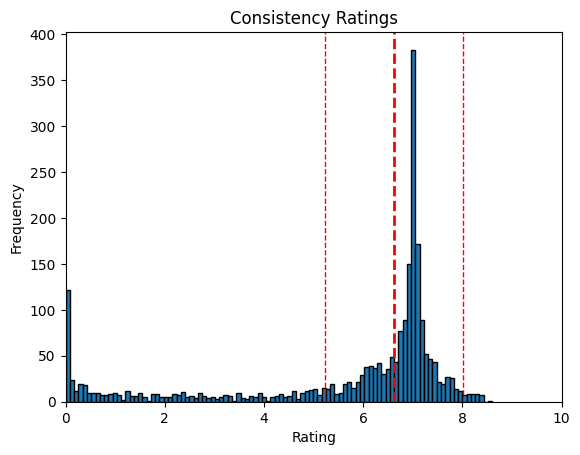

averages=[('1_0', 5.5228622555482145), ('2_0', 5.455943589215955), ('3_0', 5.840816412216149), ('4_0', 5.746241253995487), ('5_0', 5.624758212723391), ('6_0', 5.620783033982911), ('7_0', 5.671191375553736), ('8_0', 5.118309517754937), ('9_0', 5.164105751789363), ('0_0', 5.178915271842337), ('0_1', 2.379463498489116), ('0_2', 4.668624822885274), ('1_2', 5.5536785718400035), ('0_3', 0.6375584272456533), ('1_3', 4.943102674718221), ('2_3', 3.3183725373227184), ('0_4', 3.789911983424052), ('1_4', 4.48098835861955), ('2_4', 3.5194208448889115), ('3_4', 5.078609941675958), ('0_5', 4.91270500080229), ('1_5', 5.007866357358696), ('2_5', 4.236566699933165), ('3_5', 5.5082327469700525), ('4_5', 4.972262587107053), ('0_6', 4.830957029823096), ('1_6', 5.357432862513126), ('2_6', 5.742272022845097), ('3_6', 5.566250210552304), ('4_6', 5.847841934421795), ('5_6', 5.148316468187157), ('0_7', 5.327582175880577), ('1_7', 4.806978666840021), ('2_7', 4.957011060696627), ('3_7', 5.238891204703536), ('4_7'

In [88]:
directory = 'Ratings/Mistral/'
fileName = directory + 'TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_{}_Ratings_Mistral_mistral_instruct.p'
                        # TinyLlama-1.1B-Chat-v1.0-5.0bpw-h6-exl2-stories_1_Ratings_Mistral_mistral_instruct

tinyMistral = getAllRatings(fileName)

plotAllHistograms(tinyMistral)


combined_dict = {}
for key in tinyMistral['Craftsmanship']:
    combined_dict[key] = tinyMistral['Craftsmanship'][key] + tinyMistral['Creativity'][key] + tinyMistral['Consistency'][key]
topN(combined_dict, 5)

# Mistral

baseRatingList=[6.669930251666575, 6.033117658649478, 6.604051906565527, 7.254007135867415, 5.98489621506935, 6.726585887954682, 6.266150557571328, 7.001111239250221, 6.227377434466165, 6.194527901537426]
10
4960


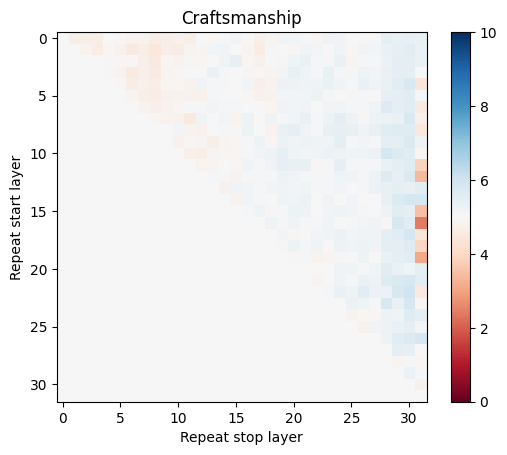

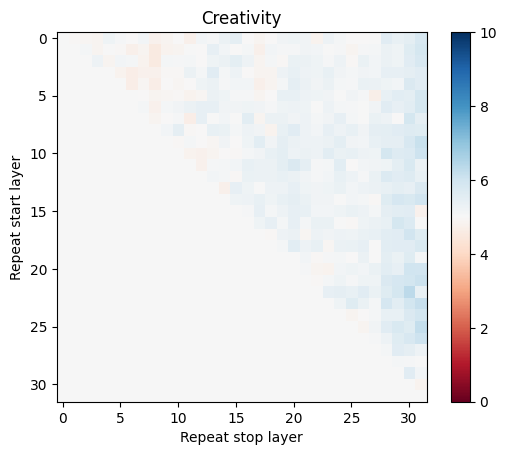

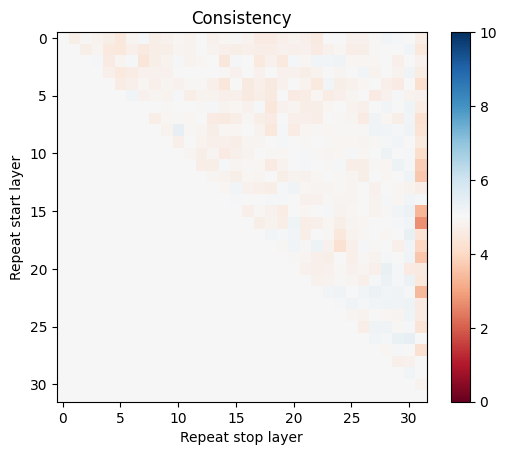

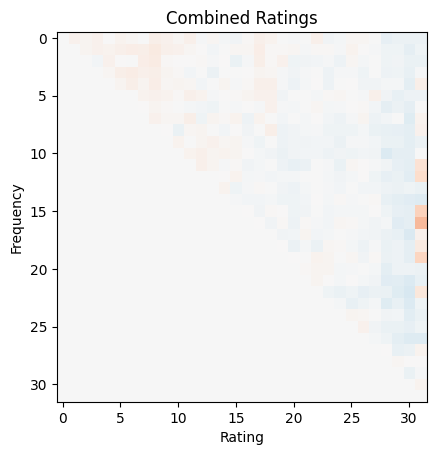

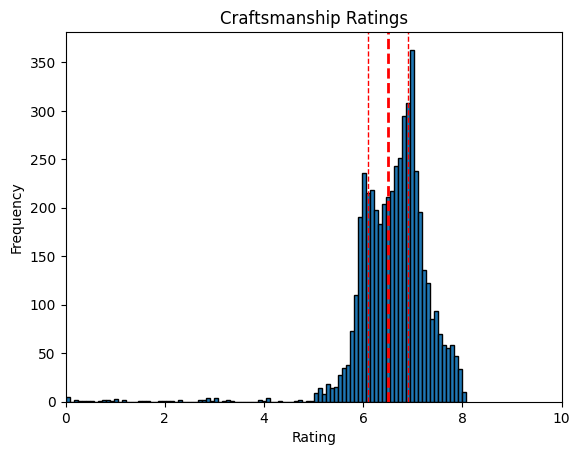

baseRatingList=[4.949144632005721, 5.069282667399095, 5.6234068441933545, 7.0239214463115225, 5.037110401617239, 5.946821238037167, 6.334375101228614, 6.764966399503313, 5.45701714079388, 5.047506032664928]
10
4960


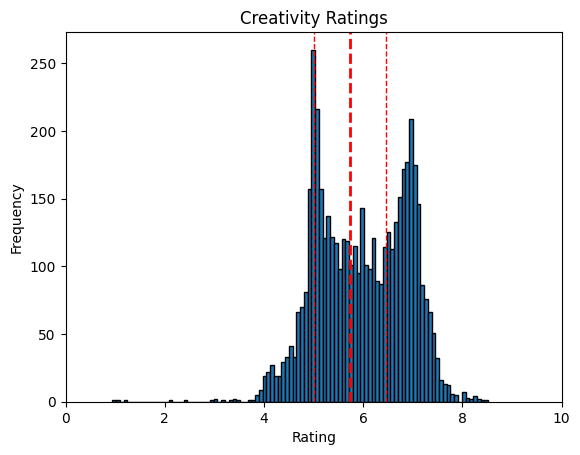

baseRatingList=[7.420092772805439, 7.345546677198142, 7.894714299411744, 7.305045551536612, 7.622153973134851, 8.497316338832233, 7.812229918937259, 8.169733711180907, 7.987641716353574, 7.486625138664547]
10
4960


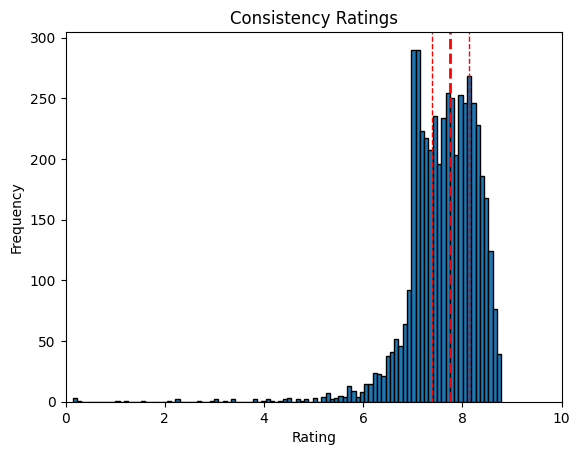

averages=[('0_0', 6.658546939680277), ('0_1', 6.447741661354687), ('0_2', 6.505747424254967), ('1_2', 6.536363726503782), ('0_3', 6.445504510226018), ('1_3', 6.452975182711659), ('2_3', 6.78192370672174), ('0_4', 6.628125035960912), ('1_4', 6.484450539337564), ('2_4', 6.449768769022843), ('3_4', 6.572256505735468), ('0_5', 6.48041795302454), ('1_5', 6.385719343720025), ('2_5', 6.632490978848009), ('3_5', 6.373991091852976), ('4_5', 6.511217736114166), ('0_6', 6.548327398377635), ('1_6', 6.327227079562468), ('2_6', 6.693935782441328), ('3_6', 6.273352893940098), ('4_6', 6.3503472680931115), ('5_6', 6.665973736791908), ('0_7', 6.669394210875102), ('1_7', 6.355347672587073), ('2_7', 6.317916907519989), ('3_7', 6.419040622897404), ('4_7', 6.508062078599521), ('5_7', 6.490540176406026), ('6_7', 6.634888844357961), ('0_8', 6.369466968328307), ('1_8', 6.206567282927486), ('2_8', 6.264794959300605), ('3_8', 6.376760152873407), ('4_8', 6.343618496929296), ('5_8', 6.437097128748388), ('6_8', 6.5

In [90]:
directory = 'Ratings/Mistral/'
fileName = directory + 'Mistral-7B-Instruct-v0.2-stories_{}_Ratings_Mistral_mistral_instruct.p'
                      # Mistral-7B-Instruct-v0.2-stories_1 _Ratings_Mistral_mistral_instruct
mistralMistral = getAllRatings(fileName)

plotAllHistograms(mistralMistral)


combined_dict = {}
for key in mistralMistral['Craftsmanship']:
    combined_dict[key] = mistralMistral['Craftsmanship'][key] + mistralMistral['Creativity'][key] + mistralMistral['Consistency'][key]
topN(combined_dict, 5)

# Review Mistral

## Baseline
Solid but short answer.

## Top 5 keys with their averages for Craftsmanship:
Key: 10_29, Average: 5.762960147857666
Solid, slightly more personality than the base model

Key: 10_19, Average: 5.752908515930176
Also great

Key: 5_29, Average: 5.696372842788696
even better!

Key: 20_29, Average: 5.670412302017212
Key: 13_28, Average: 5.664324855804443


## Top 5 keys with their averages for Creativity:
Key: 10_29, Average: 5.119102191925049
Key: 13_28, Average: 5.098078012466431
Key: 8_28, Average: 5.098076820373535
Key: 1_29, Average: 5.0922736644744875
Excellent!

Key: 19_29, Average: 5.088565683364868


## Top 5 keys with their averages for Consistency:
Key: 10_19, Average: 5.599330902099609
Good clear text. no issues


Key: 12_21, Average: 5.5969030380249025
Key: 3_26, Average: 5.593423223495483
Key: 10_29, Average: 5.582774114608765
Key: 2_24, Average: 5.562200546264648

# Nous Capybara

baseRatingList=[6.669930251666575, 6.033117658649478, 6.604051906565527, 7.254007135867415, 5.98489621506935, 6.726585887954682, 6.266150557571328, 7.001111239250221, 6.227377434466165, 6.194527901537426]
10
4960


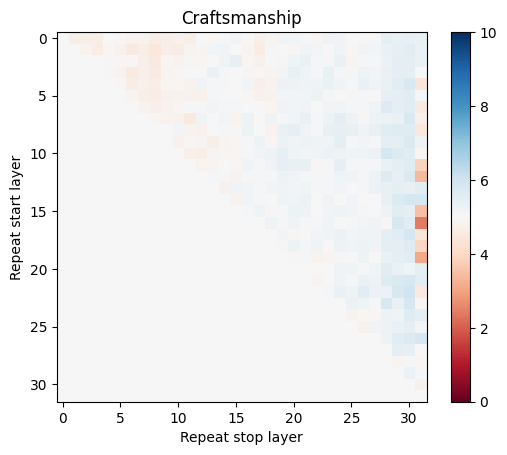

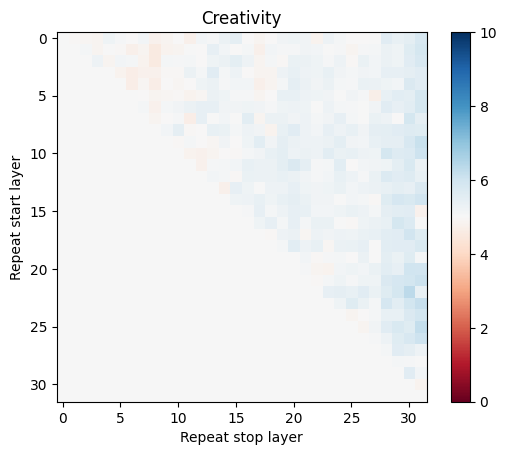

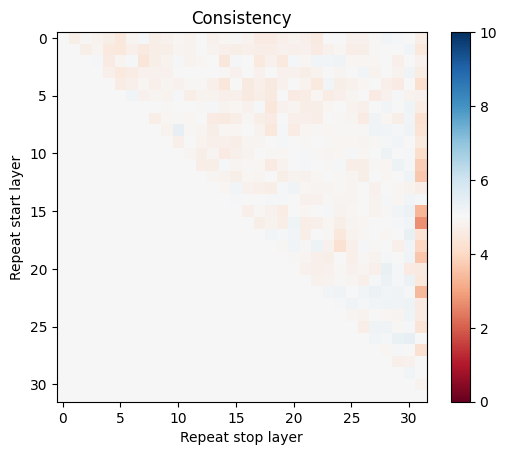

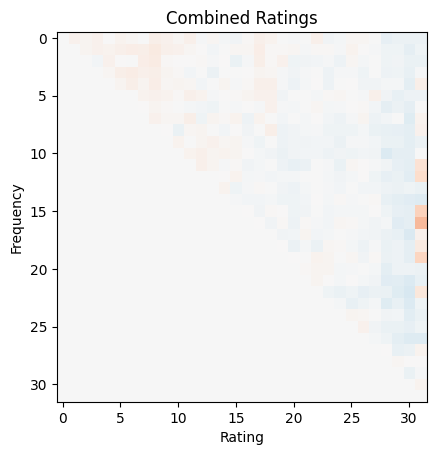

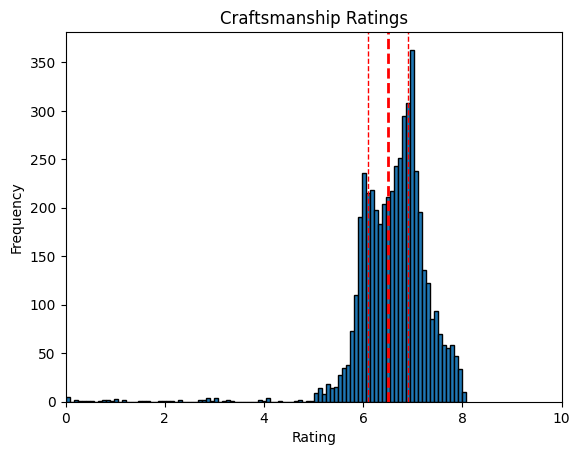

baseRatingList=[4.949144632005721, 5.069282667399095, 5.6234068441933545, 7.0239214463115225, 5.037110401617239, 5.946821238037167, 6.334375101228614, 6.764966399503313, 5.45701714079388, 5.047506032664928]
10
4960


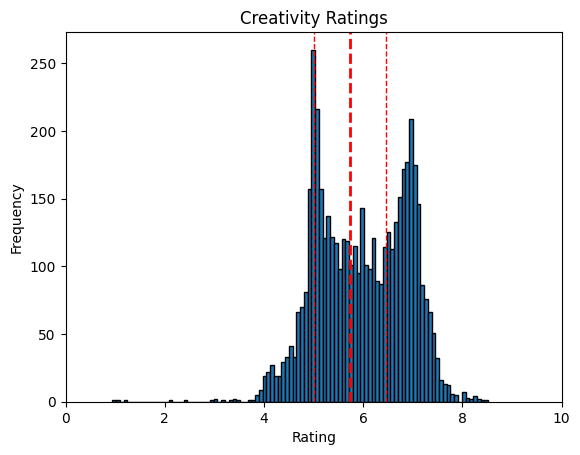

baseRatingList=[7.420092772805439, 7.345546677198142, 7.894714299411744, 7.305045551536612, 7.622153973134851, 8.497316338832233, 7.812229918937259, 8.169733711180907, 7.987641716353574, 7.486625138664547]
10
4960


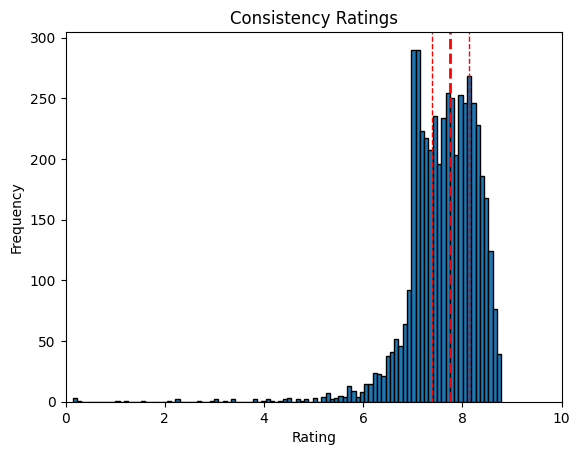

averages=[('0_0', 6.658546939680277), ('0_1', 6.447741661354687), ('0_2', 6.505747424254967), ('1_2', 6.536363726503782), ('0_3', 6.445504510226018), ('1_3', 6.452975182711659), ('2_3', 6.78192370672174), ('0_4', 6.628125035960912), ('1_4', 6.484450539337564), ('2_4', 6.449768769022843), ('3_4', 6.572256505735468), ('0_5', 6.48041795302454), ('1_5', 6.385719343720025), ('2_5', 6.632490978848009), ('3_5', 6.373991091852976), ('4_5', 6.511217736114166), ('0_6', 6.548327398377635), ('1_6', 6.327227079562468), ('2_6', 6.693935782441328), ('3_6', 6.273352893940098), ('4_6', 6.3503472680931115), ('5_6', 6.665973736791908), ('0_7', 6.669394210875102), ('1_7', 6.355347672587073), ('2_7', 6.317916907519989), ('3_7', 6.419040622897404), ('4_7', 6.508062078599521), ('5_7', 6.490540176406026), ('6_7', 6.634888844357961), ('0_8', 6.369466968328307), ('1_8', 6.206567282927486), ('2_8', 6.264794959300605), ('3_8', 6.376760152873407), ('4_8', 6.343618496929296), ('5_8', 6.437097128748388), ('6_8', 6.5

In [91]:
directory = 'Ratings/Mistral/'
fileName = directory + 'Mistral-7B-Instruct-v0.2-stories_{}_Ratings_Mistral_mistral_instruct.p'
                      # Mistral-7B-Instruct-v0.2-stories_1 _Ratings_Mistral_mistral_instruct
nousMistral = getAllRatings(fileName)

plotAllHistograms(nousMistral)


combined_dict = {}
for key in mistralMistral['Craftsmanship']:
    combined_dict[key] = nousMistral['Craftsmanship'][key] + nousMistral['Creativity'][key] + nousMistral['Consistency'][key]
topN(combined_dict, 5)


In [100]:
def compareHistograms(ratingsDict1, ratingsDict2, ratingsDict3, criteria, legend):

    
    ratingList1 = []
    for l in ratingsDict1[criteria].values():
        ratingList1.extend(l)

    ratingList2 = []
    for l in ratingsDict2[criteria].values():
        ratingList2.extend(l)
    
    ratingList3 = []
    for l in ratingsDict3[criteria].values():
        ratingList3.extend(l)

    scores = np.array(range(10))
    ratingList1 = [np.sum(scores*np.array(v)) for v in ratingList1]
    ratingList2 = [np.sum(scores*np.array(v)) for v in ratingList2]
    ratingList3 = [np.sum(scores*np.array(v)) for v in ratingList3]

    print(f'{ratingList1=}')
    print(f'{ratingList2=}')
    print(f'{ratingList3=}')

    plt.figure()
    plt.title(f'{criteria} Ratings')
    plt.hist([ratingList1, ratingList2, ratingList3],histtype='bar', bins=30, edgecolor='black', density=True)
    plt.legend(legend)


ratingList1=[5.002463115731669, 4.309442446849023, 5.006926863280647, 5.893154491169678, 5.117336847975122, 5.106659757296357, 5.166188459387572, 5.317986668120431, 5.004372772626654, 5.063594260426739, 3.811000977935071, 4.999734441890251, 5.065041602533483, 5.129959527940236, 5.079081772292383, 6.660363560950405, 5.121007110855647, 5.770606464359376, 5.0635562345003455, 5.1158927419725275, 5.473141031622291, 4.665929725460889, 5.067362154484243, 6.117494223817541, 5.928763757284351, 6.383071394335234, 5.619062137273531, 4.999804183940153, 5.6674543436667335, 4.925187155082424, 5.954951979074858, 5.0444298416712865, 5.924458389423444, 4.963221581321954, 5.639730365618767, 5.929447373668475, 5.088942219636572, 5.074408577859671, 5.0551971031255025, 5.356276841697702, 5.024083942584118, 7.108845422912729, 5.343129501155561, 5.767477985121663, 5.413456421108754, 5.768900701696277, 5.594375785159519, 4.843452105599938, 5.10858265709069, 5.551433575242796, 4.941431751408309, 5.568909963167

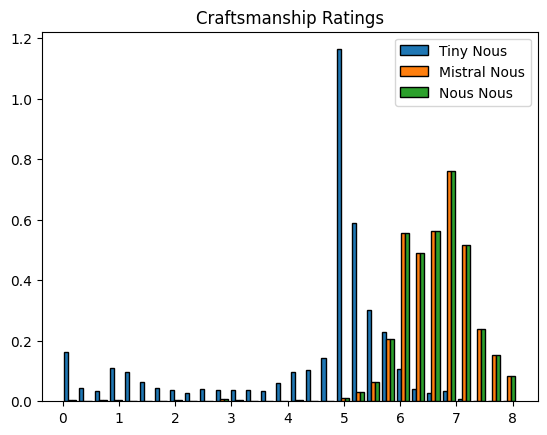

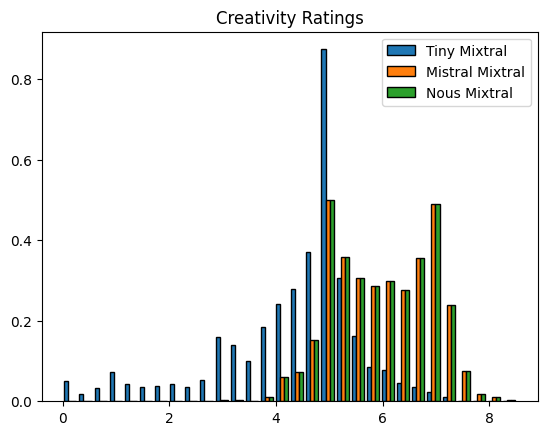

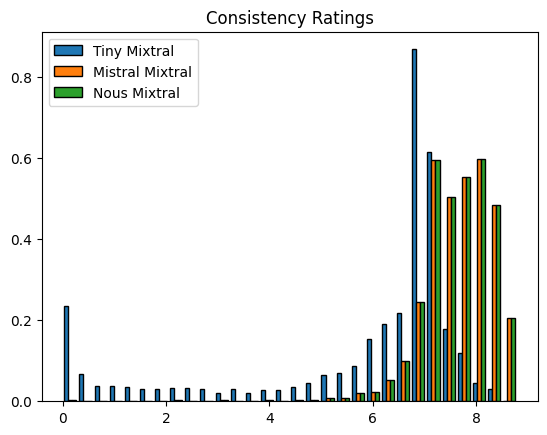

In [102]:
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Craftsmanship', legend=['Tiny Nous', 'Mistral Nous', 'Nous Nous'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Creativity', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Consistency', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])

ratingList1=[5.002463115731669, 4.309442446849023, 5.006926863280647, 5.893154491169678, 5.117336847975122, 5.106659757296357, 5.166188459387572, 5.317986668120431, 5.004372772626654, 5.063594260426739, 3.811000977935071, 4.999734441890251, 5.065041602533483, 5.129959527940236, 5.079081772292383, 6.660363560950405, 5.121007110855647, 5.770606464359376, 5.0635562345003455, 5.1158927419725275, 5.473141031622291, 4.665929725460889, 5.067362154484243, 6.117494223817541, 5.928763757284351, 6.383071394335234, 5.619062137273531, 4.999804183940153, 5.6674543436667335, 4.925187155082424, 5.954951979074858, 5.0444298416712865, 5.924458389423444, 4.963221581321954, 5.639730365618767, 5.929447373668475, 5.088942219636572, 5.074408577859671, 5.0551971031255025, 5.356276841697702, 5.024083942584118, 7.108845422912729, 5.343129501155561, 5.767477985121663, 5.413456421108754, 5.768900701696277, 5.594375785159519, 4.843452105599938, 5.10858265709069, 5.551433575242796, 4.941431751408309, 5.568909963167

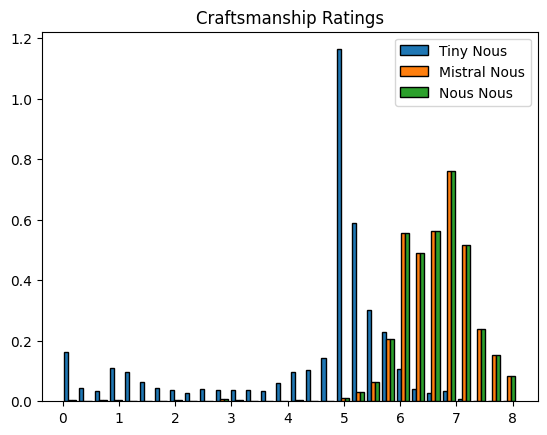

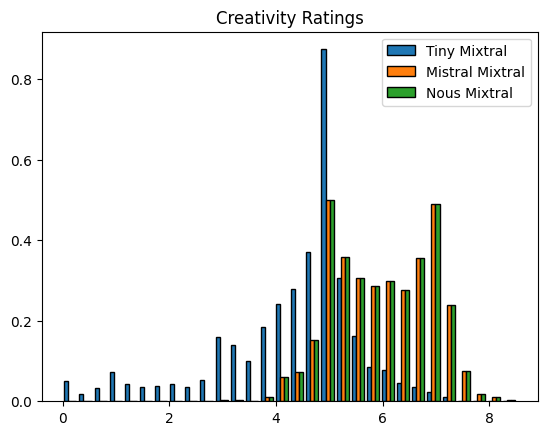

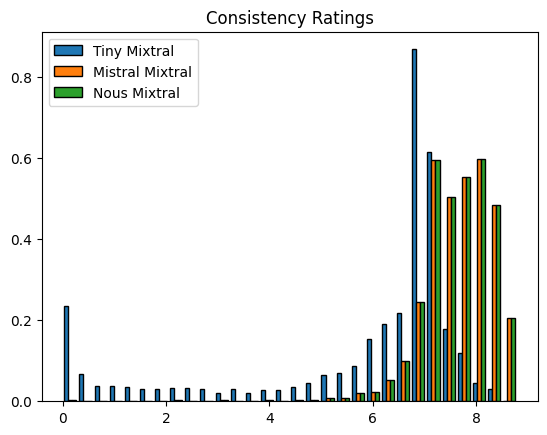

In [ ]:
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Craftsmanship', legend=['Tiny Nous', 'Mistral Nous', 'Nous Nous'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Creativity', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])
compareHistograms(tinyMistral, mistralMistral, nousMistral, criteria = 'Consistency', legend=['Tiny Mixtral', 'Mistral Mixtral', 'Nous Mixtral'])